In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [ ]:
Data = pd.read_csv('airquality.csv')

In [ ]:
Data

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
4,5,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...,...
148,149,30.0,193.0,6.9,70,9,26
149,150,NaN,145.0,13.2,77,9,27
150,151,14.0,191.0,14.3,75,9,28
151,152,18.0,131.0,8.0,76,9,29


In [ ]:
Data.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
4,5,NaN,NaN,14.3,56,5,5


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  153 non-null    int64  
 1   Ozone       116 non-null    float64
 2   Solar.R     146 non-null    float64
 3   Wind        153 non-null    float64
 4   Temp        153 non-null    int64  
 5   Month       153 non-null    int64  
 6   Day         153 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 8.5 KB


Data Cleaning

In [ ]:
Data.isnull().sum()

,0
Unnamed: 0,0
Ozone,37
Solar.R,7
Wind,0
Temp,0
Month,0
Day,0


In [ ]:
DataCleaned = Data.dropna()

In [ ]:
DataCleaned

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
6,7,23.0,299.0,8.6,65,5,7
...,...,...,...,...,...,...,...
147,148,14.0,20.0,16.6,63,9,25
148,149,30.0,193.0,6.9,70,9,26
150,151,14.0,191.0,14.3,75,9,28
151,152,18.0,131.0,8.0,76,9,29


Data Integration

In [ ]:
Data1 = Data.loc[1:55, ['Ozone','Solar.R','Wind']]

In [ ]:
Data1

,Ozone,Solar.R,Wind
1,36.0,118.0,8.0
2,12.0,149.0,12.6
3,18.0,313.0,11.5
4,NaN,NaN,14.3
5,28.0,NaN,14.9
6,23.0,299.0,8.6
7,19.0,99.0,13.8
8,8.0,19.0,20.1
9,NaN,194.0,8.6
10,7.0,NaN,6.9


In [ ]:
Data2 = Data.loc[55:111, ['Temp','Month','Day']]

In [ ]:
Data2

,Temp,Month,Day
55,75,6,25
56,78,6,26
57,73,6,27
58,80,6,28
59,77,6,29
60,83,6,30
61,84,7,1
62,85,7,2
63,81,7,3
64,84,7,4


In [ ]:
Data_main=pd.concat([Data1,Data2])

In [ ]:
Data_main

,Ozone,Solar.R,Wind,Temp,Month,Day
1,36.0,118.0,8.0,NaN,NaN,NaN
2,12.0,149.0,12.6,NaN,NaN,NaN
3,18.0,313.0,11.5,NaN,NaN,NaN
4,NaN,NaN,14.3,NaN,NaN,NaN
5,28.0,NaN,14.9,NaN,NaN,NaN
...,...,...,...,...,...,...
107,NaN,NaN,NaN,77.0,8.0,16.0
108,NaN,NaN,NaN,79.0,8.0,17.0
109,NaN,NaN,NaN,76.0,8.0,18.0
110,NaN,NaN,NaN,78.0,8.0,19.0


Data Transformation

In [ ]:

Data_main = {'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
'Value': [100, 120, 90, 110, 130, 140, 150, 160, 170, 180, 190, 200]}

In [ ]:

Data_main = pd.read_csv('airquality.csv')

In [ ]:

month_mapping = {
1: 'January',
2: 'February',
3: 'March',
4: 'April',
5: 'May',
6: 'June',
7: 'July',
8: 'August',
9: 'September',
10: 'October',
11: 'November',
12: 'December'
}

In [ ]:

Data_main['Month'] = Data_main['Month'].map(month_mapping)

In [ ]:

Data_main

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,May,1
1,2,36.0,118.0,8.0,72,May,2
2,3,12.0,149.0,12.6,74,May,3
3,4,18.0,313.0,11.5,62,May,4
4,5,NaN,NaN,14.3,56,May,5
...,...,...,...,...,...,...,...
148,149,30.0,193.0,6.9,70,September,26
149,150,NaN,145.0,13.2,77,September,27
150,151,14.0,191.0,14.3,75,September,28
151,152,18.0,131.0,8.0,76,September,29


Error Correcting

In [ ]:
Data_main.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,May,1
1,2,36.0,118.0,8.0,72,May,2
2,3,12.0,149.0,12.6,74,May,3
3,4,18.0,313.0,11.5,62,May,4
4,5,NaN,NaN,14.3,56,May,5


In [ ]:
Data_main['Temp'].unique()

array([67, 72, 74, 62, 56, 66, 65, 59, 61, 69, 68, 58, 64, 57, 73, 81, 79,
       76, 78, 84, 85, 82, 87, 90, 93, 92, 80, 77, 75, 83, 88, 89, 91, 86,
       97, 94, 96, 71, 63, 70])

In [ ]:
Data_main.Temp.value_counts()

,count
Temp,
81,11
76,9
82,9
77,7
86,7
78,6
79,6
73,5
87,5


In [ ]:
Data_main.count()

,0
Unnamed: 0,153
Ozone,116
Solar.R,146
Wind,153
Temp,153
Month,153
Day,153


Data Model Building

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:

data =pd.read_csv('airquality.csv')

In [ ]:

data.dropna(subset=['Ozone','Solar.R'], inplace=True)

In [ ]:

X =data[['Solar.R']]
y =data['Ozone']

In [ ]:

model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [ ]:

y_pred = model.predict(X)

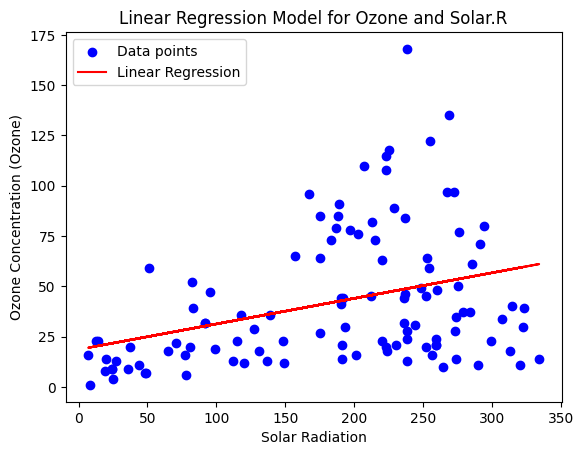

In [ ]:

plt.scatter(X,y, color ='blue',label='Data points')

plt.plot(X,y_pred, color='red',label='Linear Regression')

plt.title('Linear Regression Model for Ozone and Solar.R')
plt.xlabel('Solar Radiation')
plt.ylabel('Ozone Concentration (Ozone)')
plt.legend()

plt.show()